In [1]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def hills_estimator(X):
    n = X.size
    res = np.zeros(n-2)
    for k in range(1, n-1):
        sum = 0.0
        for i in range(1,k):
            sum += np.log(X[n-i+1 -1]) - np.log(X[n-k - 1])
        res[k-1] = sum/k
    return res

In [3]:
def K(x):
    if (np.absolute(x) <= 1):
        return (3.0/4)*(1-x*x)
    else:
        return 0

In [4]:
def g_h(x, Y, h):
    sum = 0
    n = Y.size
    for i in range(0, n):
        sum += K(1.0*(x-Y[i])/h)
    return sum*1.0/(n*h)

In [5]:
def weib_p(t, a):
    return a*np.power(t, a-1)*np.exp(-np.power(t, a))

In [6]:
S = 1000
lognorm = np.random.lognormal(mean = 5, sigma = 10, size = S)
U = np.random.uniform(0, 1, S)
weibull_2 = np.random.weibull(a = 2, size=S)
weibull_10 = np.random.weibull(a = 0.1, size=S)

In [7]:
lognorm_hill = hills_estimator(np.sort(lognorm))
weibull_2_hill = hills_estimator(np.sort(weibull_2))
weibull_10_hill = hills_estimator(np.sort(weibull_10))

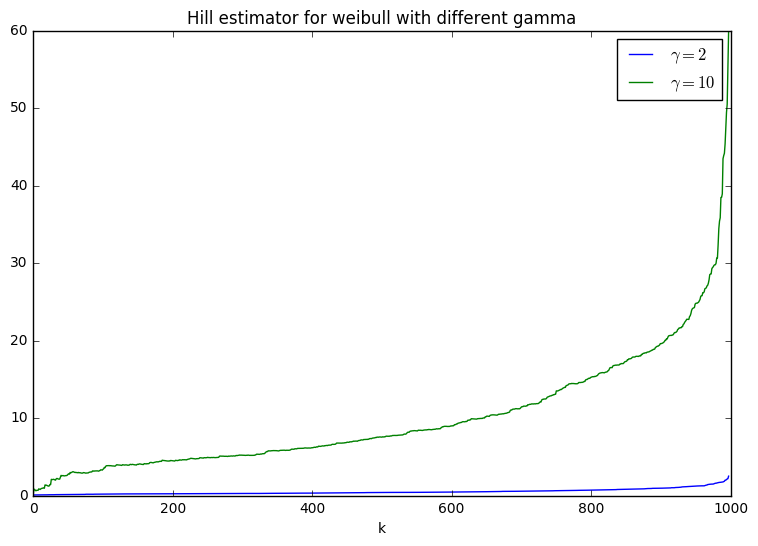

In [8]:
plt.figure(figsize=(9,6))
plt.plot(weibull_2_hill, label = '$\gamma = 2$')
plt.plot(weibull_10_hill, label = '$\gamma = 10$')
plt.title('Hill estimator for weibull with different gamma')
plt.xlabel('k')
plt.legend()
plt.show()

In [9]:
gamma = 10
X = weibull_10
Y1 = np.log(X)
Y2 = (2/np.pi)*np.arctan(X)
Y3 = 1 - np.power((1+gamma*X), -1.0/(2*gamma))
h = np.sqrt(np.var(Y1))*np.power(S, -1.0/5)
g_h(5, Y1, h)

0.033130333380829574

In [ ]:
t = np.linspace(1, 100, 1000)
one = np.zeros(1000)
two = np.zeros(1000)
three = np.zeros(1000)
for i in range(0,1000):
    one[i] = g_h(t[i], Y1, h)*(1.0/t[i])
    two[i] = g_h(t[i], Y2, h)*(2.0/np.pi)*(1.0/(1+t[i]*t[i]))
    three[i] = g_h(t[i], Y3, h)*(1.0/(2*gamma))*np.power((1+gamma*t[i]), -1.0/(2*gamma)-1)

In [32]:
true_p = weib_p(t, 0.1)

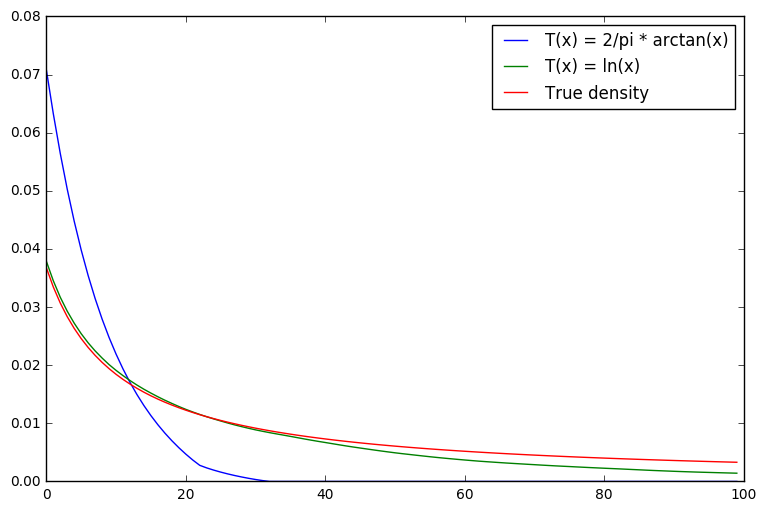

In [33]:
plt.figure(figsize=(9,6))
plt.plot(two[0:100], label='T(x) = 2/pi * arctan(x)')
plt.plot(one[0:100], label = 'T(x) = ln(x)')
plt.plot(true_p[0:100], label = 'True density')
plt.legend()
plt.show()